<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/Compute_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/haberman.csv.xls')
df.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations:1)Patient age varies from 30 to 83 years.
2)75% of the patients have 4 positive axillary nodes.
3)25% of the patients have 0 positive axillary nodes.

In [ ]:
df.isnull().sum()

patient_age                0
operation_year             0
positive_axillary_nodes    0
survival_status            0
dtype: int64

Observation:No null values are present in the dataset

In [ ]:
df.survival_status.unique()

array([1, 2])

Target column is survival_status

In [ ]:
for i in range(len(df)):
  if df["survival_status"][i]==1:
    df["survival_status"][i]=1
  else:
    df["survival_status"][i]=0

0:Did'nt survive 1:Survived

In [ ]:
df['survival_status']=df['survival_status'].astype('int')

In [ ]:
df.loc[:,'survival_status'].value_counts()/len(df)

1    0.734426
0    0.265574
Name: survival_status, dtype: float64

1)73.4426% of the people survived.
2)26.5574% of the people died.

In [ ]:
cor=df.corr()
cor

,patient_age,operation_year,positive_axillary_nodes,survival_status
patient_age,1.000000,0.092623,-0.066548,-0.064351
operation_year,0.092623,1.000000,-0.003277,0.004076
positive_axillary_nodes,-0.066548,-0.003277,1.000000,-0.286191
survival_status,-0.064351,0.004076,-0.286191,1.000000


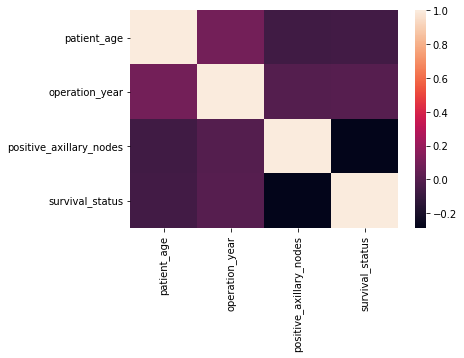

In [ ]:
sns.heatmap(cor)

Since the corelation between no 2 columns is more than 0.5 or less than -0.5, we can say that no two columns are strongly corelated. Hence, none of the columns can be dropped.

In [ ]:
#df[['patient_age','survival_status']].groupby(['patient_age']).mean()

In [ ]:
pd.crosstab(df.patient_age,df.survival_status)

survival_status,0,1
patient_age,,
30,0,2
31,0,2
33,0,2
34,2,5
35,0,2
36,0,2
37,0,6
38,1,9
39,1,5


Text(0.5, 0, 'Patient age')

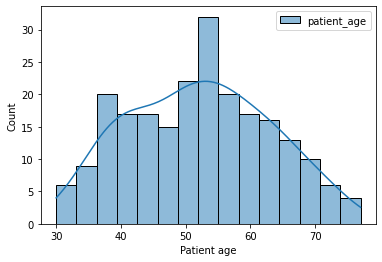

In [ ]:
survived=pd.DataFrame(df[df['survival_status']==1])
survived1=pd.DataFrame(survived.patient_age)
sns.histplot(data=survived1,bins=15,kde=True)
plt.xlabel('Patient age')

Text(0.5, 0, 'Patient age')

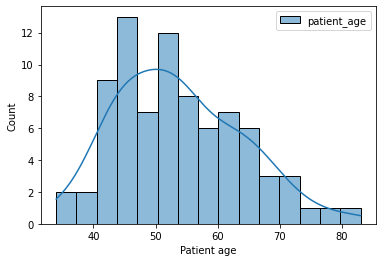

In [ ]:
dead=pd.DataFrame(df[df['survival_status']==0])
dead1=pd.DataFrame(dead.patient_age)
sns.histplot(data=dead1,bins=15,kde=True)
plt.xlabel('Patient age')

Text(0.5, 0, 'positive_auxillary_nodes')

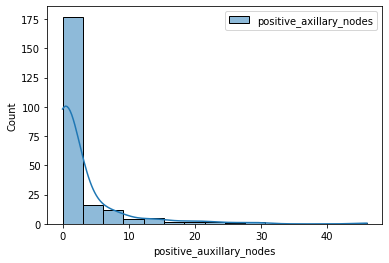

In [ ]:
survived=pd.DataFrame(df[df['survival_status']==1])
survived1=pd.DataFrame(survived.positive_axillary_nodes)
sns.histplot(data=survived1,bins=15,kde=True)
plt.xlabel('positive_auxillary_nodes')

Text(0.5, 0, 'positive_auxillary_nodes')

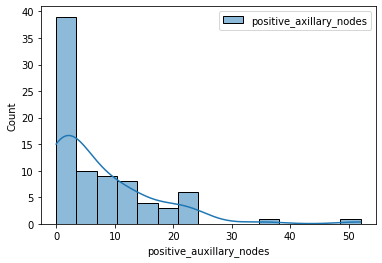

In [ ]:
dead=pd.DataFrame(df[df['survival_status']==0])
dead1=pd.DataFrame(dead.positive_axillary_nodes)
sns.histplot(data=dead1,bins=15,kde=True)
plt.xlabel('positive_auxillary_nodes')

Text(0.5, 0, 'Operation year')

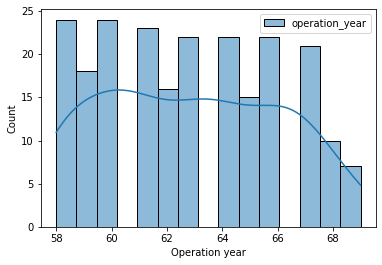

In [ ]:
survived=pd.DataFrame(df[df['survival_status']==1])
survived1=pd.DataFrame(survived.operation_year)
sns.histplot(data=survived1,bins=15,kde=True)
plt.xlabel('Operation year')

Text(0.5, 0, 'Operation year')

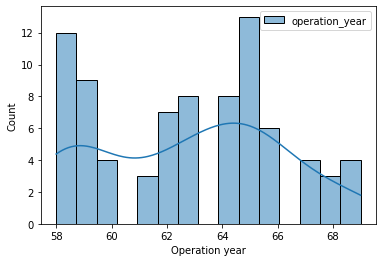

In [ ]:
dead=pd.DataFrame(df[df['survival_status']==0])
dead1=pd.DataFrame(dead.operation_year)
sns.histplot(data=dead1,bins=15,kde=True)
plt.xlabel('Operation year')

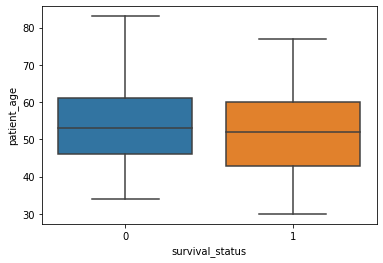

In [ ]:
sns.boxplot(data=df, x="survival_status", y="patient_age")

1)People who are less than 50 years of age have a higher chance of survival.

2)People who are more than 60 years of age have a lower chance of survival.

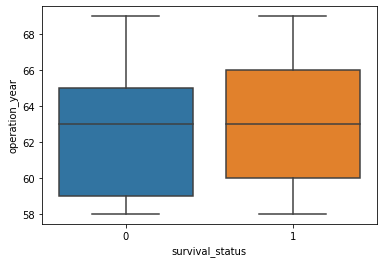

In [ ]:
sns.boxplot(data=df, x="survival_status", y="operation_year")

1)Most of the operations done between 1959-1960 were unsuccessful as the patients did not survive.


2)Most of the operations done between 1964-1965 were successful as the patients survived.

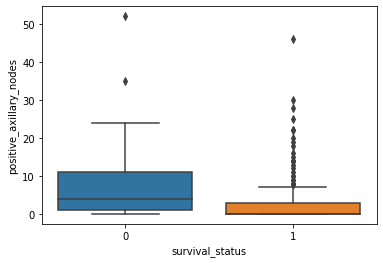

In [ ]:
sns.boxplot(data=df, x="survival_status", y="positive_axillary_nodes")

1)Patients having 4 or lesser axil nodes  are more likely to survive.

2)Box plot shows that, the more number of axil nodes, the more patients likely to die.